In [1]:
%env OMP_NUM_THREADS=1
import firedrake as fd
import numpy as np
import matplotlib.pyplot as plt
from scattering import *
from mesh import *

env: OMP_NUM_THREADS=1


In [2]:
c = 340
d = np.array([1., 0.])
d /= np.linalg.norm(d)
h0 = 0.2

# Sphere

In [3]:
shape = "sphere"
a0 = b0 = 2.0
a1 = b1 = 2.25
R0 = 1.2
R1 = 1.9
if R0 is not None and R1 is not None:
    annular = True
else:
    annular = False

cached_mesh = True
if cached_mesh:
    mesh = fd.Mesh(shape + str(0) + ".msh")
else:
    mesh = generate_mesh(a0, a1, b0, b1, shape, h0, R0=R0, R1=R1)

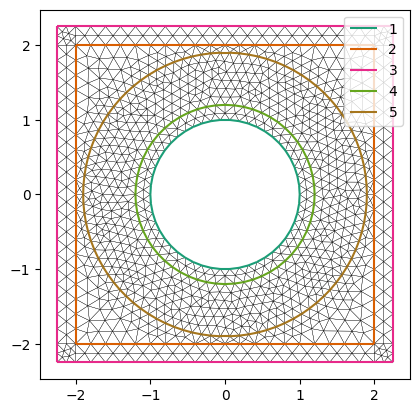

In [4]:
plot_mesh(mesh)

In [5]:
k = 1
omega = k * c
x = fd.SpatialCoordinate(mesh)
inc = fd.exp(1j * fd.dot(fd.as_vector(d), x))
g = -inc

uh = solve(mesh, k, a0, a1, b0, b1, g, annular=annular)

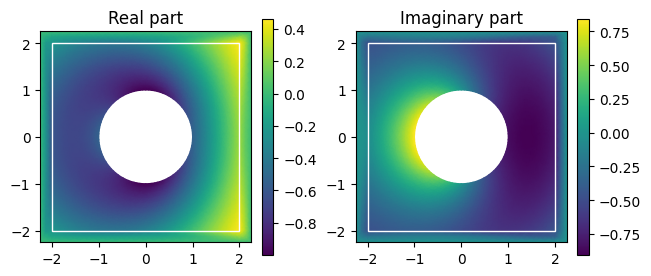

In [6]:
plot_field(uh, a0, a1, b0, b1)

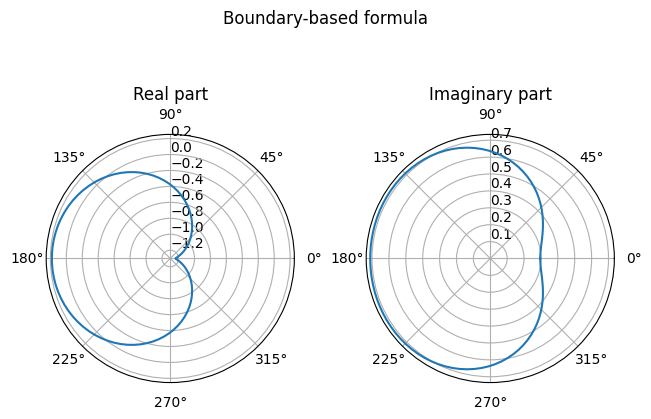

In [7]:
plot_far_field(k, uh, inc)

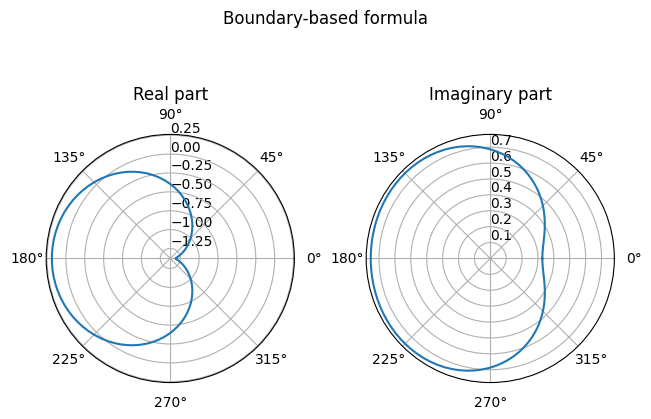

In [8]:
plot_far_field(k, uh, inc, boundary=4)

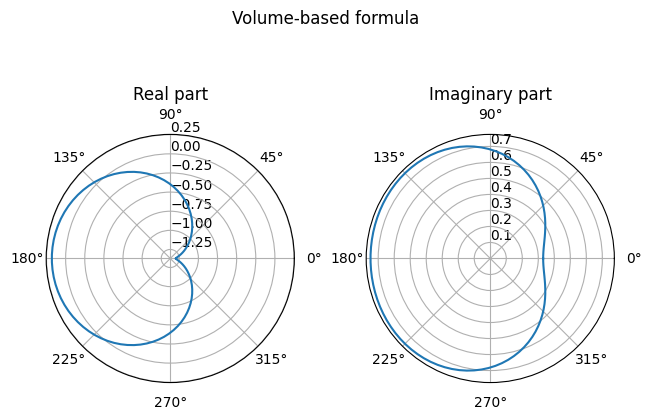

In [9]:
plot_far_field_vol(k, uh, R0, R1, inc)

# Kite

In [10]:
shape = "kite"
a0 = b0 = 4.0
a1 = b1 = 4.25
R0 = 2.5
R1 = 3.5
if R0 is not None and R1 is not None:
    annular = True
else:
    annular = False

cached_mesh = True
if cached_mesh:
    mesh = fd.Mesh(shape + str(0) + ".msh")
else:
    mesh = generate_mesh(a0, a1, b0, b1, shape, h0, R0=R0, R1=R1)

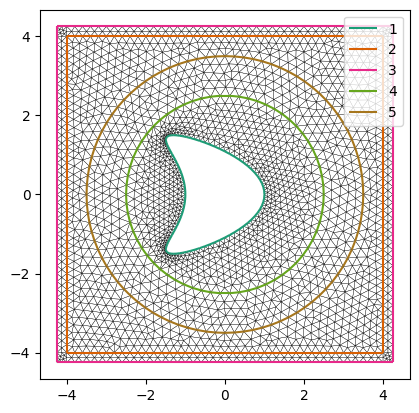

In [11]:
plot_mesh(mesh)

In [12]:
k = 1
omega = k * c
x = fd.SpatialCoordinate(mesh)
inc = fd.exp(1j * fd.dot(fd.as_vector(d), x))
g = -inc

uh = solve(mesh, k, a0, a1, b0, b1, g, annular=annular)

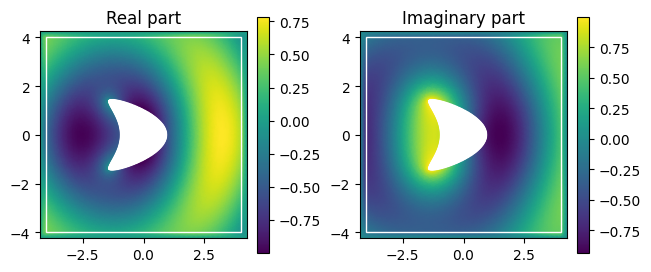

In [13]:
plot_field(uh, a0, a1, b0, b1)

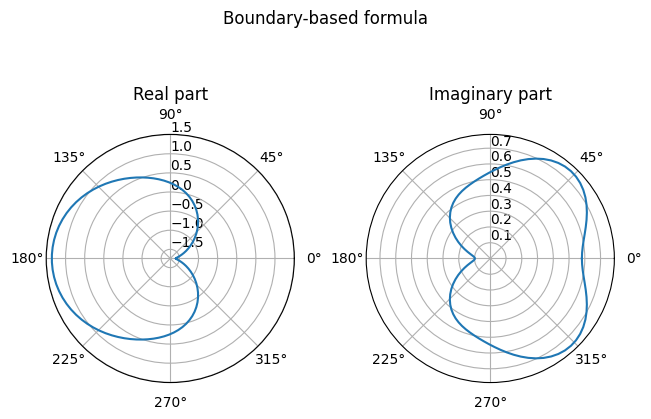

In [14]:
plot_far_field(k, uh, inc)

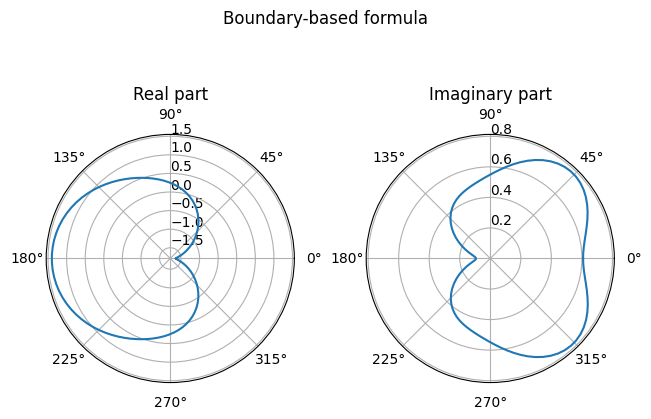

In [15]:
plot_far_field(k, uh, inc, boundary=4)

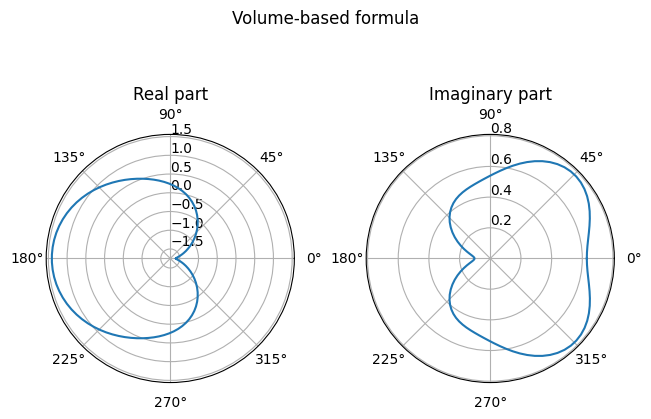

In [16]:
plot_far_field_vol(k, uh, R0, R1, inc)

In [17]:
u_inf = far_field(k, uh, 0, inc)
print("Re{u_inf(d)} =", u_inf.real)
print("Im{u_inf(d)} =", u_inf.imag)

u_inf = far_field(k, uh, 0, inc, boundary=4)
print("Re{u_inf(d)} =", u_inf.real)
print("Im{u_inf(d)} =", u_inf.imag)

u_inf = far_field_vol(k, uh, 0, R0, R1, inc)
print("Re{u_inf(d)} =", u_inf.real)
print("Im{u_inf(d)} =", u_inf.imag)

Re{u_inf(d)} = -1.5911977977930165
Im{u_inf(d)} = 0.5815141468107529
Re{u_inf(d)} = -1.6361900352916146
Im{u_inf(d)} = 0.6076897476328019
Re{u_inf(d)} = -1.603114178726853
Im{u_inf(d)} = 0.6293509049632363


In [18]:
u_inf = far_field(k, uh, np.pi, inc)
print("Re{u_inf(-d)} =", u_inf.real)
print("Im{u_inf(-d)} =", u_inf.imag)

u_inf = far_field(k, uh, np.pi, inc, boundary=4)
print("Re{u_inf(d)} =", u_inf.real)
print("Im{u_inf(d)} =", u_inf.imag)

u_inf = far_field_vol(k, uh, np.pi, R0, R1, inc)
print("Re{u_inf(d)} =", u_inf.real)
print("Im{u_inf(d)} =", u_inf.imag)

Re{u_inf(-d)} = 1.360186965503384
Im{u_inf(-d)} = 0.09707408657925243
Re{u_inf(d)} = 1.398729648970881
Im{u_inf(d)} = 0.0932493566578182
Re{u_inf(d)} = 1.408497638453964
Im{u_inf(d)} = 0.10252137556761676


- $Re\{u_\infty(d)\} = −1.62745750, Im\{u_\infty(d)\} = 0.60222591$  
    $Re\{u_\infty(-d)\} = 1.39694488, Im\{u_\infty(-d)\} = 0.09499635$  
    (Colton and Kress - 2019, Table 3.1)

In [19]:
# Convergence
max_level = 5
levels = np.arange(max_level)
hs = h0 / 2**levels

In [20]:
mesh_hierarchy = []
if cached_mesh:
    for level in levels:
        mesh_hierarchy.append(fd.Mesh(shape + str(level) + ".msh"))
else:
    for level in levels:
        mesh_hierarchy.append(generate_mesh(a0, a1, b0, b1, shape, h0, level, R0=R0, R1=R1))

# mesh_hierarchy = fd.MeshHierarchy(mesh, max_level)

In [21]:
k = 1
if k == 1:
    u_inf_ref = np.array([-1.62745750, 0.60222591, 1.39694488, 0.09499635])
if k == 5:
    u_inf_ref = np.array([-2.47554380, 1.68747937, -0.19945787, 0.06015893])

k = 1
refinement level 0, relative error [0.02227997 0.03439202 0.02631307 0.02187175]
refinement level 1, relative error [0.01525855 0.01776615 0.0158083  0.02535423]
refinement level 2, relative error [0.00821899 0.00894492 0.00528373 0.00329152]
refinement level 3, relative error [0.00448522 0.00449962 0.00341551 0.00934559]
refinement level 4, relative error [0.00214045 0.00257818 0.00256572 0.00508687]
----------------------------------------


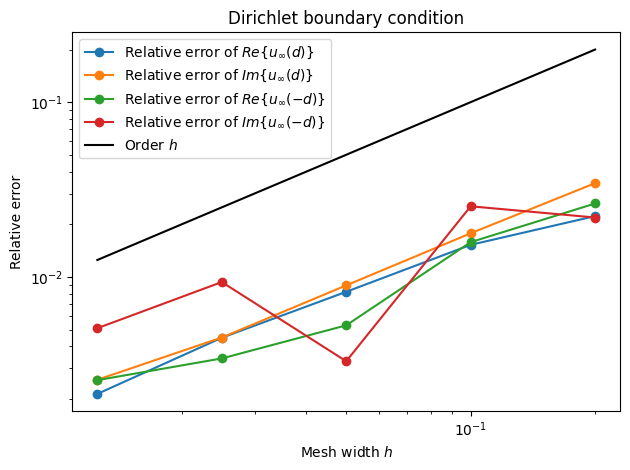

In [22]:
# Dirichlet problem
print(f"k = {k}")
errors = []
for level in levels:
    m = mesh_hierarchy[level]
    x = fd.SpatialCoordinate(m)
    inc = fd.exp(1j * fd.dot(fd.as_vector(d), x))
    g = -inc
    
    uh = solve(m, k, a0, a1, b0, b1, g, annular=annular)

    u_inf = np.empty(4)
    u_inf1 = far_field(k, uh, 0, inc)
    u_inf[0] = u_inf1.real
    u_inf[1] = u_inf1.imag
    u_inf2 = far_field(k, uh, np.pi, inc)
    u_inf[2] = u_inf2.real
    u_inf[3] = u_inf2.imag
    rel_err = np.abs((u_inf - u_inf_ref) / u_inf_ref)
    print(f"refinement level {level}, relative error {rel_err}")
    errors.append(rel_err)
errors = np.array(errors)
plt.loglog(hs, errors[:, 0], "-o",
           label=r"Relative error of $Re\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 1], "-o",
           label=r"Relative error of $Im\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 2], "-o",
           label=r"Relative error of $Re\{u_\infty(-d)\}$")
plt.loglog(hs, errors[:, 3], "-o",
           label=r"Relative error of $Im\{u_\infty(-d)\}$")
print("----------------------------------------")

plt.loglog(hs, hs, "k", label=r"Order $h$")
plt.legend()
plt.xlabel(r"Mesh width $h$")
plt.ylabel("Relative error")
plt.title("Dirichlet boundary condition")
plt.tight_layout()

k = 1
refinement level 0, relative error [0.00536575 0.00907274 0.00127762 0.01839011]
refinement level 1, relative error [0.00120045 0.00015948 0.00047877 0.00918539]
refinement level 2, relative error [0.00031409 0.00061049 0.00345222 0.00299692]
refinement level 3, relative error [0.00014907 0.00069647 0.00093686 0.01747493]
refinement level 4, relative error [1.08767082e-05 9.24118295e-04 4.39492543e-04 8.91701682e-03]
----------------------------------------


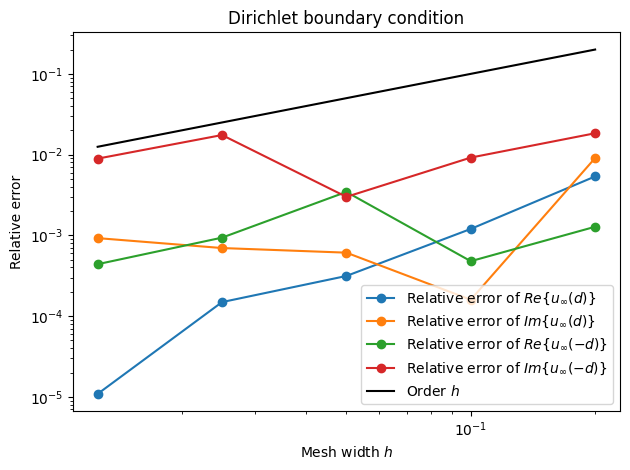

In [23]:
# Dirichlet problem
print(f"k = {k}")
errors = []
for level in levels:
    m = mesh_hierarchy[level]
    x = fd.SpatialCoordinate(m)
    inc = fd.exp(1j * fd.dot(fd.as_vector(d), x))
    g = -inc
    
    uh = solve(m, k, a0, a1, b0, b1, g, annular=annular)

    u_inf = np.empty(4)
    u_inf1 = far_field(k, uh, 0, inc, boundary=4)
    u_inf[0] = u_inf1.real
    u_inf[1] = u_inf1.imag
    u_inf2 = far_field(k, uh, np.pi, inc, boundary=4)
    u_inf[2] = u_inf2.real
    u_inf[3] = u_inf2.imag
    rel_err = np.abs((u_inf - u_inf_ref) / u_inf_ref)
    print(f"refinement level {level}, relative error {rel_err}")
    errors.append(rel_err)
errors = np.array(errors)
plt.loglog(hs, errors[:, 0], "-o",
           label=r"Relative error of $Re\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 1], "-o",
           label=r"Relative error of $Im\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 2], "-o",
           label=r"Relative error of $Re\{u_\infty(-d)\}$")
plt.loglog(hs, errors[:, 3], "-o",
           label=r"Relative error of $Im\{u_\infty(-d)\}$")
print("----------------------------------------")

plt.loglog(hs, hs, "k", label=r"Order $h$")
plt.legend()
plt.xlabel(r"Mesh width $h$")
plt.ylabel("Relative error")
plt.title("Dirichlet boundary condition")
plt.tight_layout()

k = 1
refinement level 0, relative error [0.01495788 0.04504123 0.00827002 0.07921384]
refinement level 1, relative error [0.00422513 0.01056245 0.00229509 0.02428837]
refinement level 2, relative error [0.00123955 0.00176553 0.00347535 0.00028703]
refinement level 3, relative error [0.00044386 0.0001162  0.00108271 0.01497358]
refinement level 4, relative error [7.56555957e-05 6.99153224e-04 3.86435978e-04 8.51906090e-03]
----------------------------------------


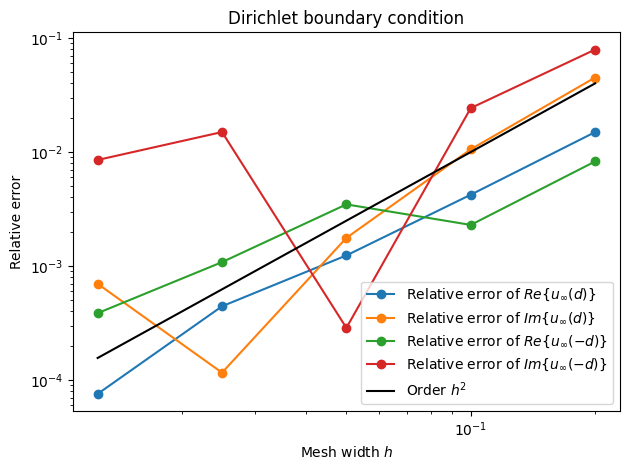

In [24]:
# Dirichlet problem
print(f"k = {k}")
errors = []
for level in levels:
    m = mesh_hierarchy[level]
    x = fd.SpatialCoordinate(m)
    inc = fd.exp(1j * fd.dot(fd.as_vector(d), x))
    g = -inc
    
    uh = solve(m, k, a0, a1, b0, b1, g, annular=annular)

    u_inf = np.empty(4)
    u_inf1 = far_field_vol(k, uh, 0, R0, R1, inc)
    u_inf[0] = u_inf1.real
    u_inf[1] = u_inf1.imag
    u_inf2 = far_field_vol(k, uh, np.pi, R0, R1, inc)
    u_inf[2] = u_inf2.real
    u_inf[3] = u_inf2.imag
    rel_err = np.abs((u_inf - u_inf_ref) / u_inf_ref)
    print(f"refinement level {level}, relative error {rel_err}")
    errors.append(rel_err)
errors = np.array(errors)
plt.loglog(hs, errors[:, 0], "-o",
           label=r"Relative error of $Re\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 1], "-o",
           label=r"Relative error of $Im\{u_\infty(d)\}$")
plt.loglog(hs, errors[:, 2], "-o",
           label=r"Relative error of $Re\{u_\infty(-d)\}$")
plt.loglog(hs, errors[:, 3], "-o",
           label=r"Relative error of $Im\{u_\infty(-d)\}$")
print("----------------------------------------")

plt.loglog(hs, hs**2, "k", label=r"Order $h^2$")
plt.legend()
plt.xlabel(r"Mesh width $h$")
plt.ylabel("Relative error")
plt.title("Dirichlet boundary condition")
plt.tight_layout()